In [1]:
import os
import pathlib
import pprint
import sys


import matplotlib.pyplot as plt
import numpy as np
from spdm.logger import logger
from spdm.data.File import File
from spdm.data.Mapping import Mapping


2022-11-14 10:10:08,269 DEBUG [spd] /home/salmon/workspace/SpDB/python/spdm/data/File.py:65:__init__: Open MDSplusFile: /home/salmon/workspace/data/efit_east mode='r'
2022-11-14 10:10:08,272 DEBUG [spd] /home/salmon/workspace/SpDB/python/spdm/data/File.py:65:__init__: Open XMLFile: [PosixPath('/home/salmon/workspace/fytok_data/mapping/EAST/imas/3/static/config.xml'), PosixPath('/home/salmon/workspace/fytok_data/mapping/EAST/imas/3/dynamic/config.xml')] mode='r'
2022-11-14 10:10:08,282 DEBUG [spd] /home/salmon/workspace/SpDB/python/spdm/data/File.py:65:__init__: Open MDSplusFile: /home/salmon/workspace/data/pcs_east mode='r'
2022-11-14 10:10:08,284 DEBUG [spd] /home/salmon/workspace/SpDB/python/spdm/data/File.py:65:__init__: Open XMLFile: [PosixPath('/home/salmon/workspace/fytok_data/mapping/EAST/imas/3/static/config.xml'), PosixPath('/home/salmon/workspace/fytok_data/mapping/EAST/imas/3/dynamic/config.xml')] mode='r'


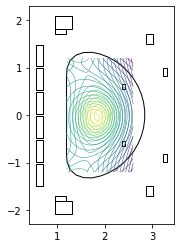

In [4]:
mapping = Mapping(mapping_path="/home/salmon/workspace/fytok_data/mapping")

# entry = mapping.find("EAST")
# entry_efit = File("/home/salmon/workspace/data/efit_east?tree_name=efit_east,shot=38300", format="mdsplus").read()

entry_efit = mapping.map(File("/home/salmon/workspace/data/efit_east?tree_name=efit_east,shot=38300",
                        format="mdsplus").read(), source_schema="EAST")
entry_pcs = mapping.map(File("/home/salmon/workspace/data/pcs_east?tree_name=pcs_east,shot=38300",
                    format="mdsplus").read(), source_schema="EAST")

plt.gca().add_patch(plt.Polygon(np.array([entry_pcs.get("wall.description_2d.vessel.annular.outline_outer.r"),
                                          entry_pcs.get("wall.description_2d.vessel.annular.outline_outer.z")]).transpose([1, 0]),
                                fill=False, closed=True))

current = [coil.get("current.data") for coil in entry_pcs.get("pf_active.coil")]

for coil in entry_pcs.get("pf_active.coil"):
    rect = coil.get(["element", 0, "geometry", "rectangle"]).dump_named()
    plt.gca().add_patch(plt.Rectangle((rect.r-rect.width/2.0, rect.z -
                                       rect.height/2.0), rect.width, rect.height, fill=False))
plt.axis('scaled')


dim1 = entry_efit.get(["equilibrium", "time_slice", 0, "profiles_2d", "grid", "dim1"])
dim2 = entry_efit.get(["equilibrium", "time_slice", 0, "profiles_2d", "grid", "dim2"])

plt.contour(dim1, dim2, entry_efit.get(["equilibrium", "time_slice", 0, "profiles_2d", "psi"]).T, levels=20, linewidths=0.5,)


dim1 = entry_efit.get(["equilibrium", "time_slice", 10, "profiles_2d", "grid", "dim1"])
dim2 = entry_efit.get(["equilibrium", "time_slice", 10, "profiles_2d", "grid", "dim2"])

plt.contour(dim1, dim2, entry_efit.get(["equilibrium", "time_slice", 10,
            "profiles_2d", "psi"]).T, levels=20, linewidths=0.5,)


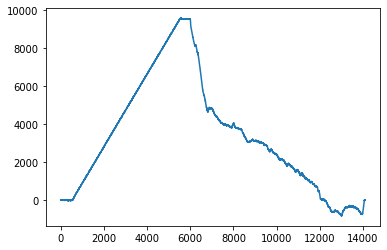

In [5]:
plt.plot(current[0])

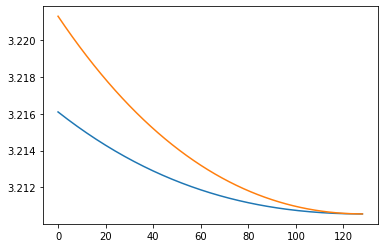

In [4]:
plt.plot(entry.get(["equilibrium", "time_slice", 0, "profiles_1d", "f"]))
plt.plot(entry.get(["equilibrium", "time_slice", 10, "profiles_1d", "f"]))

In [35]:
entry.get(["equilibrium", "time_slice", 12])[0].dump()

[{'boundary': {'type': '1',
   'outline': {'r': {'query': 'DATA(\\BDRY)[0, 0: DATA(\\NBDRY)[12]-1,12]',
     '@spdb': 'mdsplus'},
    'z': {'query': 'DATA(\\BDRY)[1, 0: DATA(\\NBDRY)[12]-1,12]',
     '@spdb': 'mdsplus'}},
   'psi': {'query': 'DATA(\\SSIBRY)', '@spdb': 'mdsplus'},
   'geometric_axis': {'r': {'query': 'DATA(\\RSURF[12])', '@spdb': 'mdsplus'},
    'z': {'query': 'DATA(\\ZSURF[12])', '@spdb': 'mdsplus'}},
   'elongation': {'query': 'DATA(\\KAPPA[12])', '@spdb': 'mdsplus'},
   'triangularity_lower': {'query': 'DATA(\\TRIBOT[12])', '@spdb': 'mdsplus'},
   'triangularity_upper': {'query': 'DATA(\\TRITOP[12])', '@spdb': 'mdsplus'}},
  'coordinate_system': {'grid_type': {'name': 'rectangular',
    'index': 0,
    'description': 'Cylindrical R,Z ala eqdsk (R=dim1, Z=dim2). \n                    In this case the position arrays should not be filled since \n                    they are redundant with grid/dim1 and dim2.'},
   'grid': {'dim1': {'query': 'DATA(\\R)[*]', '@spdb': 'md

In [3]:
"a.b".split('.')

['a', 'b']

In [26]:
from typing import Sequence


def as_path(*args, delimiter='.'):

    def _convert(v):
        if isinstance(v, str):
            return v.split(delimiter)
        elif not isinstance(v, Sequence):
            return [v]
        else:
            return v

    res = sum([_convert(v) for v in args], [])

    return res


In [27]:
as_path("equilibrium.time_slice.0.profiles_1d.f")

['equilibrium', 'time_slice', '0', 'profiles_1d', 'f']

In [8]:
list(5)

TypeError: 'int' object is not iterable

In [23]:
"-5".isdigit()

False

In [ ]:
from fytok.fymodules.equilibrium import ATEC
from fytok.fymodules. import XiaoTaoTrans

prev_profile = init_profile

while True:
    next_eq = ATEC(prev_profile, prev_eq, wall)

    next_core_source = FooSouce(next_eq, ...)

    next_core_transport = FooTransport(next_eq, ...)

    next_profile = XiaoTaoTrans(next_eq, next_core_source, next_core_transport)

    if residual(prev_profile, next_profile) < 1.0e-5:
        break
    else:
        prev_eq = next_eq
        prev_profile = next_profile

res = {
    "equilibrium": next_eq,
    "core_profiles": next_profile
}
